<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>
<br>
<center><i>Based on Notebooks created by Aline Lefebvre-Lepot</i></center>

# Root-finding for a function of one variable

&nbsp;

<img src="./figures/Abstract.png" alt="Roots" style="width: 500px;"/>

&nbsp;

<div markdown=1 class=Abstract>

In this chapter, we consider the problem of finding **roots of an equation in one variable**: find $x$ such that $f(x)=0$. We discuss numerical methods to approximate solutions of this kind of problems to an arbitrarily high accuracy. First, we formalize the notion of convergence and order of convergence for **iterative methods**. Then, we focus on three iterative algorithms for approximating roots of functions: **the bisection method**, **fixed point iterations** and **the Newton-Raphson method**. These methods are described, analyzed and used to solve 3 problems coming from physics, finance and population dynamics.

## Table of contents

- [Introduction](#intro)
- [Iterative methods: errors and convergence](#iterative)
- [The bisection method](#bisection)
- [Fixed point iterations](#fixedPoint)
- [The Newton-Raphson method](#Newton)
- [Back to the case studies](#CaseStudy)

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

The zeros (or roots) of a function $f$ are the $x$ such that $f(x)=0$. Such problems can be encountered in many situations, as it is common to reformulate a mathematical problem so that its solutions correspond to the zeros of a function. In many of these situations, the solution cannot be computed exactly and one has to design numerical algorithms to approximate the solution instead. We give below a few examples of such situations.

### Case study 1: State equation of a gaz

<img src="figures/VanDerWaals.jpg" alt="vanderWaals" style="width: 200px;"/>
  
>**Johannes Diderik van der Waals (1837-1923).**
>He is a Dutch theoretical physicist. He was primarily known for his thesis work (1873) in which he proposed a state equation for gases to take into account their non-ideality and the existence of intermolecular interactions. His new equation of state revolutionized the study of the behavior of gases. This work was followed by several other researches on molecules that have been fundamental for the development of molecular physics.

The state equation of a gas relating the pressure $p$, the volume $V$ and the temperature $T$ proposed by van der Waals can be written

$$
\left[p + a \left( \frac{N}{V}\right)^2\right] (V-Nb) = kNT,
$$

where $N$ is the number of molecules of the gas, $k$ is the Boltzmann-constant and $a$ and $b$ are coefficients depending on the gas. To determine the volume occupied by a gas at pressure $p$ and temperature $T$, we need find the $V$ which solves this equation. This problem is equivalent to finding a zero of the function $f$ defined as

$$
f(V) = \left[p + a \left( \frac{N}{V}\right)^2\right] (V-Nb) - kNT.
$$

Suppose one wants to find the volume occupied by $1000$ molecules of $\text{CO}_2$ at temperature $T=300\,K$ and pressure $p=3.5 \cdot 10^7 \,Pa$. Then, the previous equation has to be solved for $V$, with the following values of parameters $a$ and $b$ corresponding to carbon dioxide: $a=0.401 \,Pa\,m^6$ and $b=42.7 \cdot 10^{-6}\, m^3$. The Boltzmann constant is $k=1.3806503 \cdot 10^{-23} \,J\,K^{-1}$.


### Case study 2: Investment fund

Suppose someone wants to have a saving account valued at $S=30\,000$ euros upon retirement in 10 years. The saving account is empty at first, but the person makes a deposit of $d=30$ euros at the end of each month on this account. If we call $i$ the monthly interest rate and $S_n$ the capital after $n$ months, we have:

$$
S_n =  \sum_{k=0}^{n-1} d(1+i)^{k} = d \frac{(1+i)^n-1}{i}.
$$

In order to know the minimal interest rate needed to reach at least $30\,000$ euros in 10 years, we must solve the following equation for $i$:

$$
S =  d \frac{(1+i)^{n_{end}}-1}{i} \quad{} \text{ where } \quad{} n_{end} = 120,
$$

which can also be written as a root-finding problem.



### Case study 3: A first population model

<img src="figures/Malthus.jpg" alt="Malthus" style="width: 300px;"/>
  
>**Thomas Robert Malthus (1766-1834).**
>He is a British economist. He is mainly known for his works about the links between the size of a population and its productions. He published  anonymously in 1798 an *Essay on the principle of populations*. It is based on the idea that the growth of a population is essentially geometric while the growth of the production is arithmetic. This leads to the so-called Malthusianism doctrine suggesting that the population size has to be controlled to avoid a catastrophe.

Population dynamics is a branch of mathematical biology that gave rise to a great amount of research and is still very active nowadays. The objective is to study the evolution of the size and composition of populations and how the environment drives them. The first model that can be derived is a natural exponential growth model. It depends on two parameters: $\beta$ and $\delta$, the average numbers of births and deaths per individual and unit of time. If we suppose that these parameters are the same for all individuals and do not depend on the size of the population, we can denote the growth rate of the population by $\lambda = \beta - \delta$  and write:

$$
\frac{dN}{dt} = \lambda \, N
$$

where $N$ is the population size. This model leads to exponentially increasing ($\lambda>0)$ or decreasing populations ($\lambda<0$). Of course, this model can be made more realistic by including more effects, which leads for instance to the logistic population growth model. When the population is not isolated, one also has to take into account immigration or emigration. If we denote by $r$ the average number of individuals joining the community per unit of time, a new model can be written as

$$
\frac{dN}{dt} = \lambda \, N + r.
$$

You will see in MAA105 how to solve such an equation. Assuming $\lambda\neq 0$, the number of individuals at time $t$ is given by

$$
N(t) = N(0)\exp(\lambda t) + \frac{r}{\lambda}(\exp(\lambda t)-1).
$$

If one wants to estimate the natural growth rate $\lambda$ in France, one can use the following data:

| Population 01/01/2016 | Population 01/01/2017   | migratory balance in 2016 |
|-----------------------|-------------------------|---------------------------|
|  66 695 000          | 66 954 000              |   67 000                     |

and solve the corresponding equation for $\lambda$ (unit of time = year)

$$
N(2017) = N(2016)\exp(\lambda) + \frac{r}{\lambda}(\exp(\lambda)-1).
$$




<a id="iterative"></a>
## Iterative methods: errors and convergence

### Convergence / order of convergence

Some of the previous problems provide us examples where the exact solution cannot be computed through an explicit formula and has to be approximated through numerical methods.

Let us write these problems under the following generic root-finding form:

$$
\text{given }\ f: [a,b] \to \mathbb{R},\quad{} \text{find}\ x^*\in[a,b] \text{ such that } f(x^*)=0.
$$

Methods for approximating a root $x^*$ of $f$ are often iterative: algorithms generate sequences $(x_k)_{k\in\mathbb{N}}$ that are supposed to converge to $x^*$. Given such a sequence, two questions one has to answer are:
- Does the sequence indeed converge to $x^*$ ?
- if it converges, how fast does it converge to $x^*$ ?

Before going further, we formalize below the notions of convergence and convergence speed.

<div  markdown=1 class="Def">

**Convergence**. Suppose that a sequence $(x_k)_k$ is generated to approximate $x^*$. The error at step $k$ is defined as

$$
e_k= |\,x_k\,-\,x^*\,|,
$$

where $|\,\cdot\,|$ denotes the absolute value. The sequence $(x_k)_k$ is said to *converge to $x^*$* if

$$
e_k \longrightarrow 0 \quad{} \text{when}\quad{} k\to \infty.
$$

Most of the time, different sequences converging to $x^*$ can be generated. One has to choose which one to use by comparing their properties such as the computational time or the speed of convergence.

<div markdown=1 class="Ex">
Let us consider the four following sequences converging to $x^*=0$:

$$
x_k=\frac{1}{k+1}, \quad{} \bar x_k=\left(\frac{1}{2}\right)^k, \quad{} \hat x_k=\left(\frac{1}{7}\right)^k, \quad{} \text{and}\quad{} \tilde x_k=\left(\frac{1}{2}\right)^{2^k}.
$$

The values obtained for the first terms of these sequences are

$k$ | 0 | 1 | 2 | 3 | 4 | 5
:--:|:--:|:--:|:--:|:--:|:--:|:--:
 $x_k$ | 1     |      0.5 |  0.33... |  0.25 |  0.2| 0.166..
 $\bar x_k$ | 1     |      0.5 |  0.25 |  0.125 |  0.0625| 0.03125
 $\hat x_k$ | 1     |      0.14285 |  0.02041 |  0.00291 |  4.164 e -4| 5.94 e -5
 $\tilde x_k$ |0.5 |   0.25 |   0.0625|   0.00390.. | 1.52 e -5 | 2.328 e -10
  
The four sequences converge to zero but its seems that $\tilde x_k$ converges faster than $\hat x_k$, which converges faster than $\bar x_k$, which itself converges faster than $x_k$.


A way to quantify the speed at which a sequence converges is to estimate its *order of convergence*:

<div  markdown=1 class="Def">

**Order of convergence for iterative algorithms**. Suppose that the sequence $(x_k)_k$ converges to $x^*$. We say that its *order of convergence* is $\alpha\geq 1$ if

$$
\exists C>0,  \quad{} e_{k+1} \underset{k\to\infty}{\sim} C e_k^\alpha,
$$

or equivalently, if

$$
\exists C>0,  \quad{} \frac{e_{k+1}}{e_k^\alpha} \underset{k\to\infty}{\rightarrow} C.
$$


The convergence is said to be
- *sublinear* if $\alpha=1$ and $C=1$,
- *linear* if $\alpha=1$ and $C<1$,
- *quadratic* if $\alpha=2$. 

The constant $C$ is sometimes called the *rate* of convergence. 

<div markdown=1 class='Rmk'>

- If we have an estimate of the form 
$$
\exists C>0,  \quad{} e_{k+1} \leq C e_k^\alpha \qquad{}\text{for all }k\text{ large enough,}
$$
but we do not know whether $\alpha$ is the optimal exponent (i.e., if maybe the same estimate would be true for a larger $\alpha$, possibly with a different $C$), then we say that the order of convergence is *at least* $\alpha$.
- The bigger the $\alpha$, the faster the convergence when $e_k$ gets close to $0$. Roughly speaking, the number of correct digits in $x_k$ is multiplied by $\alpha$ at each step. $\alpha$ being given, the smaller the $C$, the faster the convergence.

<div markdown=1 class="DoIt"> Consider again the four following sequences converging to $x^*=0$:

$$
x_k=\frac{1}{k+1}, \quad{} \bar x_k=\left(\frac{1}{2}\right)^k, \quad{} \hat x_k=\left(\frac{1}{7}\right)^k, \quad{} \text{and}\quad{} \tilde x_k=\left(\frac{1}{2}\right)^{2^k}.
$$

Explain the results observed in the previous example by studying the order of convergence in each case. Justify your answers.

<div markdown=1 class="Answer"> 
Since $x^*=0$, we simply have $e_k = \vert x_k\vert$, $\bar e_k = \vert \bar x_k\vert$, $\hat e_k = \vert \hat x_k\vert$  and $\tilde e_k = \vert \tilde x_k\vert$.

We easily compute

$$\frac{e_{k+1}}{e_k} = \frac{k+1}{k+2}, \quad{} \frac{\bar e_{k+1}}{\bar e_k} = \frac{1}{2}, \quad{} \frac{\hat e_{k+1}}{\hat e_k} = \frac{1}{7} \quad{} \text{ and }\quad{} \frac{\tilde e_{k+1}}{(\tilde e_k)^2} = 1. $$

Then, $x_k$, $\bar x_k$ and $\hat x_k$ converge to $x^*$ with order one while $\tilde x_k$ converges to $x^*$ with order two. This confirms the previous observations: 

- $\tilde x_k$ converges the fastest since it has a higher order of convergence. This order is $\alpha = 2$ and we indeed observe that the number of correct digits of $\tilde x_k$ roughly doubles at each step.
- The three other sequences have the same order of convergence ($\alpha = 1$), so we must look at the rate $C$ to distinguish between their speed of convergence. We find that the rate is the smallest for $\hat x_k$ ($C=1/7$), followed by $\bar x_k$ ($C=1/2$) and finally $x_k$ ($C=1$), which explains why $\hat x_k$ converges faster than $\bar x_k$ which itself converges faster than $x_k$.

### Graphical study of convergence

#### Study of $e_k$ versus $k$

We want to observe the convergence graphically. Let us first plot $e_k$ versus $k$.

<div markdown=1 class="DoIt"> Run the following cell to plot $e_k$ versus $k$ for the four sequences, and comment on the obtained picture.

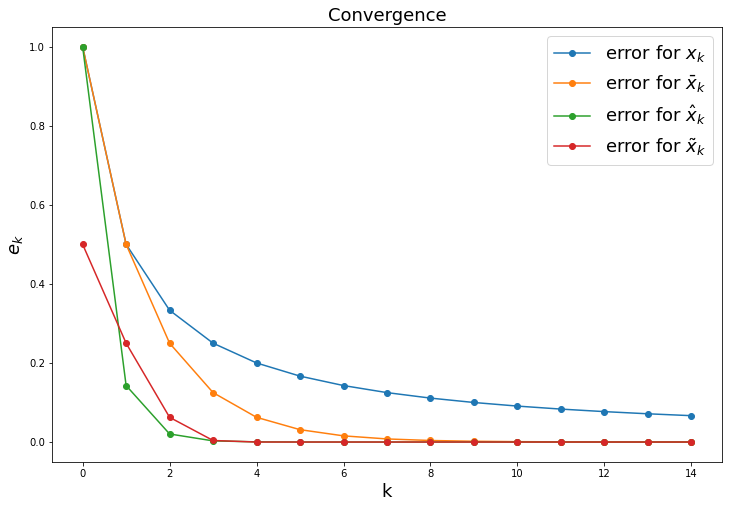

In [2]:
K = np.arange(0,15,1)
err1 = 1./(K+1) 
err2 = (1./2) ** K 
err3 = (1./7) ** K
err4 = (1./2) ** (2**K)

fig = plt.figure(figsize=(12, 8))
plt.plot(K, err1, marker="o", label='error for $x_k$')
plt.plot(K, err2, marker="o", label=r'error for $\bar{x}_k$')
## the r in the label before the '' allows to display latex symbols such as $\bar$
plt.plot(K, err3, marker="o", label=r'error for $\hat{x}_k$')
plt.plot(K, err4, marker="o", label=r'error for $\tilde{x}_k$')
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.title('Convergence', fontsize=18)
plt.show()

<div markdown=1 class='Answer'>

As expected, the error seems to go to $0$, and from the first few iterations we get the impression that the error for $x_k$ is larger than for the other sequences. However, it becomes very quickly impossible to distinguish between the three fastest converging sequences. In particular, the fact the $\tilde{x}_k$ has a higher order of convergence is not visible on this plot.

#### Study of $\,\log(e_k)$ versus $k$

The $\log$ function is of great help to better understand the behavior of the error. 

For example, since $x\to\log(x)$ is an increasing function with derivative going to infinity when $x$ goes to zero, it allows to "zoom" on the smallest values of the error, and plotting $\log(e_k)$ versus $k$ can allows us to check that the error is still decreasing and not stagnating for big values of $k$ (which can not be asserted from the previous plot).

<div markdown=1 class="DoIt"> 

Modify the following cell to plot the error versus $k$ in log-scale. More precisely, use the plt.yscale command to modify the scale for the y-axis (in order to learn how to use this command, you can either type `help(plt.yscale)` or `plt.yscale?` in a code cell, or look for "matplotlib.pyplot.yscale" on the internet). This will allow you to plot $\log(e_k)$ versus $k$, while keeping the values of $e_k$ itself on the $y$ axis. 

Comment on the obtained picture. In particular, what information can you deduce from the fact that some of the curves are lines? Recover the most information you can about the convergence of $\bar x_k$ and $\hat x_k$ from the data (you may want to use the polyfit function from numpy).

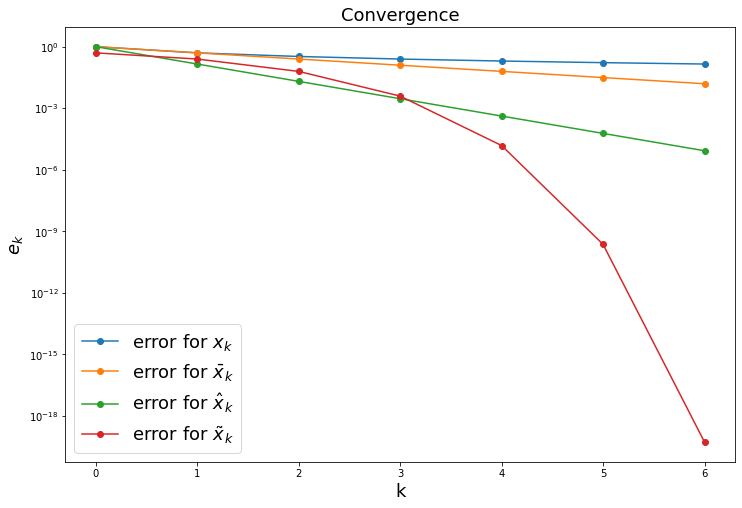

In [3]:
K = np.arange(0,7,1)
x1 = 1./(K+1) 
x2 = (1./2) ** K 
x3 = (1./7) ** K
x4 = (1./2) ** (2**K)

fig = plt.figure(figsize=(12, 8))
plt.plot(K, x1, marker="o", label='error for $x_k$')
plt.plot(K, x2, marker="o", label=r'error for $\bar x_k$') 
plt.plot(K, x3, marker="o", label=r'error for $\hat x_k$')
plt.plot(K, x4, marker="o", label=r'error for $\tilde x_k$')
plt.legend(loc='lower left', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')
plt.title('Convergence', fontsize=18)
plt.show()

<div markdown=1 class='Answer'>

Thanks to the log-scale, we immediately see that $\tilde x_k$ converges faster than $\hat x_k$, which converges faster than $\bar x_k$, which itself converges faster than $x_k$, which could not be seen in the previous plot. Also, the error for $\bar x_k$ and $\hat x_k$ seems to give lines in this scale (you may comment out the error for $\tilde x_k$ to better visualize this, and in particular to realize that we do NOT get a straight line for $x_k$). This suggests there exists $\bar a<0$, $\bar b\in\mathbb{R}$, and $\hat a<0$, $\hat b\in\mathbb{R}$, such that

$$
\log (\bar e_k) = \bar ak + \bar b,\quad{} \text{and}\quad{} \log (\hat e_k) = \hat ak + \hat b,
$$

which means that

$$
\bar e_k = e^\bar b \bar C^k,\quad{} \text{and}\quad{} \hat e_k = e^\hat b \hat C^k,
$$

with $\bar C = e^{\bar a}<1$ and $\hat C = e^{\hat a}<1$. In particular, we recover that

$$
\bar e_{k+1} = \bar C \bar e_k \quad{}\text{and}\quad{} \hat e_{k+1} = \hat C \hat e_k,
$$

which means that in both cases the convergence is linear. Also, we see in the plot that the slope for $\hat x_k$ is steeper than for $\bar x_k$, therefore $\hat a < \hat a$ and we also recover that, while $\hat x_k$ and $\bar x_k$ converge at order $1$, the constant $\hat C$ for $\hat x_k$ is smaller than the constant $\bar C$ for $\bar x_k$.

In order to obtain the value of these two constants, one has to find the value of the slopes $\bar a$ and $\hat a$. This can be done using the polyfit function as below.

In [4]:
ab2 = np.polyfit(K, np.log(x2), 1) #Finding the coefficients of the line which better fits the data for \bar{x}_k
a2 = ab2[0] # the slope \bar{a}
C2 = np.exp(a2)
print("The constant barC is approximately equal to ",C2," (the theoretical value is 0.5)")

ab3 = np.polyfit(K, np.log(x3), 1) #Finding the coefficients of the line which better fits the data for \hat{x}_k
a3 = ab3[0] # the slope \hat{a}
C3 = np.exp(a3)
print("The constant hatC is approximately equal to ",C3," (the theoretical value is 1/7)")

The constant barC is approximately equal to  0.5000000000000001  (the theoretical value is 0.5)
The constant hatC is approximately equal to  0.14285714285714288  (the theoretical value is 1/7)


#### Study of $\,\log(e_{k+1})$ versus $\,\log(e_k)$

In the above plot of $\log(e_k)$ versus $k$, we could recover the order and the rate of convergence for some of the sequences, but only for those which converge linearly. In general, one has to use yet another scale in order to graphically find the order of convergence. Indeed, assume that the error is such that

$$
e_{k+1} \approx C e_k^\alpha,
$$

for some unknown $C$ and $\alpha$. Then, we get 

$$
\log e_{k+1} \approx \log \left(C e_k^\alpha\right) = \alpha \log e_k +  \log C.
$$

As a consequence, the order of convergence can be graphically observed by plotting $\log e_{k+1}$ versus $\log e_k$ and finding the slope.

<div markdown=1 class="DoIt"> Run the following cell and explain the resulting plot. You can add some plots to confirm the slopes of the lines.

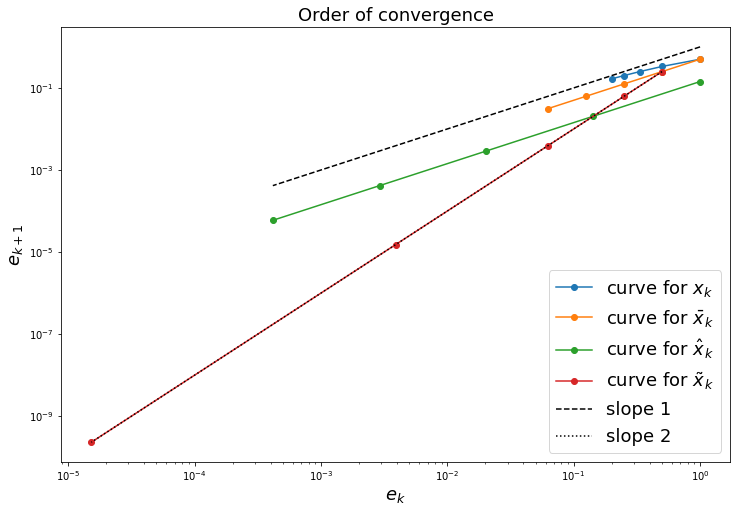

In [5]:
K = np.arange(0,6,1)
x1 = 1./(K+1)
x2 = (1./2) ** K 
x3 = (1./7) ** K
x4 = (1./2) ** (2**K)

fig = plt.figure(figsize=(12, 8))

plt.loglog(x1[:-1:], x1[1:], marker="o", label='curve for $x_k$') #log-log scale
plt.loglog(x2[:-1:], x2[1:], marker="o", label=r'curve for $\bar x_k$') #log-log scale
plt.loglog(x3[:-1:], x3[1:], marker="o", label=r'curve for $\hat x_k$') #log-log scale
plt.loglog(x4[:-1:], x4[1:], marker="o", label=r'curve for $\tilde x_k$') #log-log scale
plt.loglog(x3[:-1:],x3[:-1:],'--k',label='slope 1')
plt.loglog(x4[:-1:],x4[:-1:]**2,':k',label='slope 2')

## Instead of using plt.loglog everytime, we can also keep using plt.plot and change the 
## scale of the axes at the end with plt.xscale('log') and plt.yscale('log'), see below

# plt.plot(x1[:-1:], x1[1:], marker="o", label='curve for $x_k$') 
# plt.plot(x2[:-1:], x2[1:], marker="o", label=r'curve for $\bar x_k$') 
# plt.plot(x3[:-1:], x3[1:], marker="o", label=r'curve for $\hat x_k$') 
# plt.plot(x4[:-1:], x4[1:], marker="o", label=r'curve for $\tilde x_k$') 
# plt.plot(x3[:-1:],x3[:-1:],'--k',label='slope 1')
# plt.plot(x4[:-1:],x4[:-1:]**2,':k',label='slope 2')
# ## We now use log-scale in both directions
# plt.xscale('log')
# plt.yscale('log')

plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

<div markdown=1 class='Answer'>

In this log-log scale all the curves seem to be lines, or at least to get asymptotically close to a line for $x_k$, and we can get the order of convergence of each sequence from the slope of the corresponding line. The curves for $x_k$, $\bar x_k$ and $\hat x_k$ become parallel to a line of slope $1$, which confirms that the order of convergence is $1$ is those cases, and similarly that the convergence is of order 2 for $\tilde x_k$.

<div markdown=1 class='Rmk'>

We obtained the order of convergence visually, by comparing the error curves with some lines of known slope (here 1 and 2), but we could also have computed the slope as in the previous example, using polyfit, to find the order of convergence. This would work well except maybe for $x_k$, for which we do not get a line in log-log scale. This is because the convergence is sublinear for $x_k$, in which case one should use yet another scale to better analyze the convergence. In the remainder of this chapter we mostly deal with linear and quadratic convergence, but we will come back to sublinear convergence later on in the course.

### Error estimator

To finish, let us emphasize that, in real problems $x^*$ is usually not known, and therefore we cannot compute the value of the true error at step $k$. Instead we try to find a (computable) bound for the error, which gives us a “worst-case” error:

<div  markdown=1 class="Def">

**Error estimator**. Suppose that a sequence $(x_k)_k$ is generated to approximate $x^*$. The sequence $(\beta_k)_k$ is an error estimator if

- $\beta_k\geq 0$ is computable
- $\beta_k$ is an upper-bound for the error: $\, e_k \leq \beta_k$ for all $k$

In that case, if the estimator $\beta_k \rightarrow 0$ when $k\to \infty$, we obtain that

- the sequence $x_k$ converges to $x^*$
- the error goes to zero at least as fast as the sequence $\beta_k$.

One has to take care that an estimator only provides an upper bound on the error. As a consequence, the error can go to zero faster than the estimator.


<a id="bisection"></a>
## The bisection method

The first method to approximate a solution to $f(x)=0$ is based on the Intermediate Value Theorem (see Appendix). Suppose $f$ is a continuous function on the interval $[a,b]$ and that $f(a)$ and $f(b)$ have opposite signs: $f(a)\,f(b)<0$. Then, there exists $x^*$ in $(a,b)$ such that $f(x^*)=0$.

Starting from an interval $I_0=[a_0,b_0]$ such that $f(a_0)\,f(b_0)\leq 0$, such an $x^*$ is approximated as follows. Let $x_0$ be the midpoint of $I_0$:

$$
x_0 = \frac{a_0+b_0}{2}.
$$

Then, the bisection method iterates by choosing $I_1=[a_1,b_1]$ and $x_1$ as follows:

- if $f(a_0)\,f(x_0)\leq 0$ then there exists a zero of $f$ in $[a_0,x_0]$, so we set 

$$
a_1=a_0,\quad{} b_1=x_0 \quad{} \text{and}\quad{} x_1 = \frac{a_1+b_1}{2},
$$

- else, we must have $f(x_0)\,f(b_0)\le 0$ and there exists a zero of $f$ in $[x_0,b_0]$, so we set 

$$
a_1=x_0,\quad{} b_1=b_0 \quad{} \text{and}\quad{} x_1 = \frac{a_1+b_1}{2}.
$$

As such, the bisection method generates a sequence $x_k$, and we will prove that this sequence does converge to a zero of $f$. However, in practice an algorithm can only do finitely many operations, which means we must add a so-called *stopping criterion* to tell the algorithm when to stop. This will be discussed in more details below.

An example of the first two iterations is illustrated on an example in the figure below.

<img src="figures/Bisection.png" alt="Bisection" style="width: 500px;" />

The bisection method leads to the following algorithm:

<div  markdown=1 class="Algo">

**Bisection method.** Computes a sequence $(x_k)_k$, approximating $x^*$ solution to $f(x^*)=0$.


\begin{align*}
INPUT:&\quad{} f, a, b\\
DO:&\quad{} x = (a+b)/2\\
&\quad{} \text{While stopping criterion is not met do}\\
&\quad{}\quad{}\quad{} \text{If } \quad{} f(a)\,f(x)\leq 0 ,  \quad{} b=x \quad{}\text{ else }\quad{} a=x\\
&\quad{}\quad{}\quad{} x = (a+b)/2\\
&\quad{} \text{end while}\\
RETURN:&\quad{} x\\
\end{align*}

### Stopping criterion

For any kind of iterative method, we would like to stop the algorithm only when the sequence $x_k$ is *close enough to having converged*. Of course, without knowing what the limit $x^*$ is, it is impossible to know for sure how close to the limit we are, so we have to make some kind of guess. A usual choice is to fix a tolerance $\varepsilon$, and to stop the algorithm once

$$
\vert x_k - x_{k-1} \vert \le \varepsilon \qquad{}\text{or}\qquad{} \frac{\vert x_k - x_{k-1} \vert}{\vert x_k\vert} \le \varepsilon.
$$

Since we are trying to find a zero of $f$, another natural possibility is to stop the algorithm once 

$$
\vert f(x_k)\vert \leq \varepsilon.
$$

Notice that, if $x_k$ does converge to a zero $x^*$ of $f$, and if $f'(x^*) \neq 0$, then

$$
\vert f(x_k)\vert \sim \vert f'(x^*) \vert \vert x_k - x^*\vert,
$$

and the stopping criterion on $\vert f(x_k)\vert$ is related to a criterion on $e_k = \vert x_k - x^*\vert$. However, for this to hold we must already know that $x_k$ is close enough to $x^*$, so it is hard to make this link rigorous. 

If we happen to have an error estimator $\beta_k$ available, then we can also use it to define a stopping criterion, and stop the algorithm once 

$$
\beta_k \leq \varepsilon.
$$

In that case, we know for sure that when the algorithm stops, the error $e_k$ is below $\varepsilon$.

<div markdown=1 class='Rmk'>

In practice, whatever the chosen stopping criterion, it is important to add an extra one: the algorithm must stop if the number $k$ of iteration reaches some prescribed threshold $k_{max}$. This is a safety net to ensure that the algorithm does not end up running forever, even if the initial stopping criterion never ends up being satisfied.

### Example

We now implement the bisection method and test it to approximate $x^*$, the unique solution in $\mathbb R$ to $f(x) = x^3-2=0$. 

<div markdown=1 class="DoIt"> Complete the following function encoding $f$.

In [6]:
## Function f: x -> x^3 -2

def ftest(x):
    return x**3-2

<div markdown=1 class="DoIt"> Complete the following function, so that it computes the sequence generated using the bisection algorithm for a given function $f$ and initialized by an interval $[a_0,b_0]$. 

The algorithm terminates when the stopping criterion of your choice is satisfied, or when a given maximal number $k_{max}$ of iterations have been achieved. The output is a vector $x$ containing the $x_k$ which have been computed. 

In [7]:
def Bisection(f, a0, b0, k_max, eps):
    """
    Bisection algorithm with stopping criterion based on |f(x_k)|
    -----------------------
    Inputs: 
    f : name of the function
    a0, b0 : bounds of the initial interval I_0=[a_0,b_0] with f(a_0)f(b_0) <= 0
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k of mipoints of I_k
    """
    ## We first check that the initial interval is guaranteed to contain a zero
    if f(a0)*f(b0) > 0:
        print("The inputs do not satisfy the assumptions of the bissection method")
        return
    
    x = np.zeros(k_max+1)     # create vector x of zeros with size k_max+1
    k = 0                 # initialize k
    a = a0                # initialize a
    b = b0                # initialize b
    x[0] = (a+b)/2        # initialize x_0
    while  np.abs(f(x[k])) > eps  and  k < k_max :  
        if f(a) * f(x[k]) <= 0 :
            b = x[k] 
        else:
            a = x[k] 
        k = k+1
        x[k] = (a+b)/2
    return x[:k+1] #removes the extra zeros and outputs exactly the computed x_k

In [8]:
help(Bisection)

Help on function Bisection in module __main__:

Bisection(f, a0, b0, k_max, eps)
    Bisection algorithm with stopping criterion based on |f(x_k)|
    -----------------------
    Inputs: 
    f : name of the function
    a0, b0 : bounds of the initial interval I_0=[a_0,b_0] with f(a_0)f(b_0) <= 0
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k of mipoints of I_k



<div markdown=1 class='Fur'>

To make things simple, we tried to keep the above implementation of the bisection as close as possible to the description we previously made of that algorithm. However, in practice if we wanted to optimize the implementation, we would need to reduce as much as possible the number of times the function $f$ is called. A better implementation in that regard could be as follows.

In [9]:
def Bisection_optimized(f, a0, b0, k_max, eps):
    """
    Bisection algorithm with stopping criterion based on |f(x_k)|, and fewer calls to f
    -----------------------
    Inputs: 
    f : name of the function
    a0, b0 : bounds of the initial interval I_0=[a_0,b_0] with f(a_0)f(b_0) <= 0
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k of mipoints of I_k
    """
    ## We first check that the initial interval is guaranteed to contain a zero
    if f(a0)*f(b0) > 0:
        print("The inputs do not satisfy the assumptions of the bissection method")
        return
        
    x = np.zeros(k_max+1)     # create vector x of zeros with size k_max+1
    k = 0                 # initialize k
    a = a0                # initialize a
    b = b0                # initialize b
    x[0] = (a+b)/2        # initialize x_0
    fa = f(a)
    fx = f(x[0])
    while  np.abs(fx) > eps  and  k < k_max :  
        if fa * fx <= 0 :
            b = x[k] 
        else:
            a = x[k]
            fa = fx
        k = k+1
        x[k] = (a+b)/2
        fx = f(x[k])
    return x[:k+1] #removes the extra zeros and outputs exactly the computed x_k

<div markdown=1 class="DoIt"> Test the bisection method to compute $x^*=2^{1/3}$ solution to $f(x)=0$. Initialize with $[a_0,b_0]=[1,2]$ and select values for the maximal number of iterations $k_{max}$ and the tolerance $\varepsilon$. Plot the error $e_k$ versus $k$. Use a log scale for the error (y-axis). Do not forget to add a title to the figure and labels to the axes (see the graphical study in the previous section for an example).

xstar = 1.2599210498948732
x = [1.5        1.25       1.375      1.3125     1.28125    1.265625
 1.2578125  1.26171875 1.25976562 1.26074219 1.26025391 1.26000977
 1.2598877  1.25994873 1.25991821 1.25993347 1.25992584 1.25992203
 1.25992012 1.25992107 1.2599206  1.25992084 1.25992095 1.25992101
 1.25992104 1.25992106 1.25992105 1.25992105 1.25992105 1.25992105
 1.25992105 1.25992105 1.25992105 1.25992105 1.25992105]


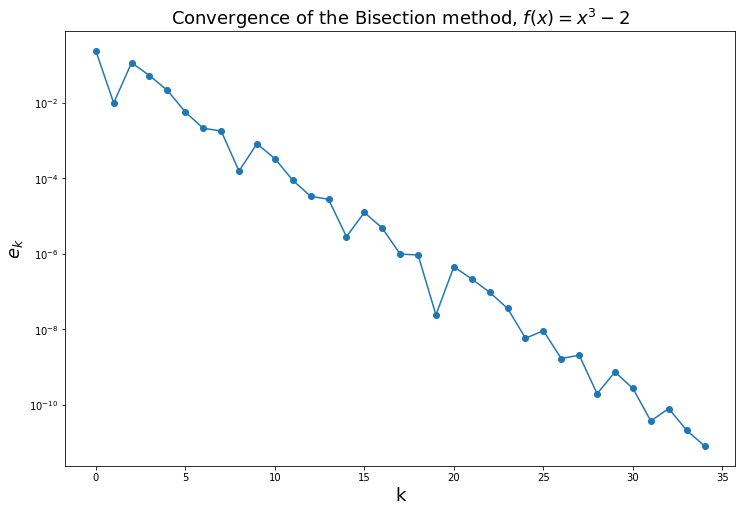

In [10]:
# Test for f(x)=x^3-2 on I=[1,2]

xstar = 2**(1.0/3)

# parameters
a0 = 1
b0 = 2
k_max = 100
eps = 1e-10

# compute the iterations of the bisection method for I0=[1,2]
x = Bisection(ftest, a0, b0, k_max, eps)

#print x^* and x
print('xstar =', xstar)
print('x =', x)

# compute the error
err = np.abs(x-xstar)

# create the vector tabk : tabk[k]=k for each iteration made
tabk = np.arange(0, err.size)

# plot the error versus k
fig = plt.figure(figsize=(12, 8))
plt.plot(tabk, err, marker="o")
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of the Bisection method, $f(x)=x^3-2$', fontsize=18)
plt.show()

plt.show()

<div markdown=1 class="DoIt"> Comment on the previous plot.

<div markdown=1 class='Answer'>

The sequence $x_k$ seems to converge to $x^*$, but the error is not monotone. Since the curve looks very roughly like a line in this log-scale for the error, one might guess that the convergence close to order $1$.

### Error estimator and stopping criterion

The above experiment is encouraging, but we are only confident about the result because we knew $x^*$ in advance. In order to use a more precise stopping criterion, related to the true error, in situations where $x^*$ is not know, we need more information about the way the sequence converges to $x^*$. To do so, error estimators are very useful. For the bisection method, we have the following result.

<div  markdown=1 class="Prop"> 

**Convergence of the bisection method.** Let $f$ be a continuous function on $[a,b]$ with $f(a)\,f(b)\leq0$. Suppose $(x_k)_k$ is the sequence generated by the bisection method. 

Then, the sequence $(x_k)_k$ converges to a zero $x^*$ of $f$, and the following estimation holds:

$$
\forall~k\geq 0,\quad{} |x_k-x^*|\,\leq\,\frac{b-a}{2^k}.
$$

> **Proof.** By definition of the bisection method, the sequence $(a_k)_k$ is non-decreasing and bounded above (by $b_0$) while the sequence $(b_k)_k$ is non-increasing and bounded below (by $a_0$). Therefore $(a_k)_k$ converges, say to $a^*$, and $(b_k)_k$ converges, say to $b^*$. Besides, since the interval $I_k$ is divided by 2 at each step of the method, we have
>
>$$
\forall~k\geq 0\quad{} |b_k-a_k|= \frac{b_0-a_0}{2^k}.
$$
>
> In particular, taking the limit $k\to\infty$, this implies that $a^*=b^*$, and we define $x^*=a^*=b^*$.  From the intermediate value theorem (see Appendix), we know that for each $k$ there exists a zero $x^*_k$ of $f$ in $I_k=[a_k,b_k]$, that is, $a_k \leq x_k^* \leq b_k$. Taking once more the limit $k\to\infty$ we get that $(x^*_k)_k$ converges to $x^*$, and since $f(x^*_k)=0$ for all $k$, we get $f(x^*)=0$ by continuity of $f$. Therefore $x^*$ is indeed a zero of $f$.
>
>By construction $x^*$ belongs to $I_k=[a_k,b_k]$ for each $k$, but so does $x_k$, which means that
>
>$$
\forall~k\geq 0\quad{} |x_k-x^*|\leq |b_k-a_k| \leq \frac{b-a}{2^k}.
$$
>
> This proves the convergence of $x_k$ to $x^*$ and provides the requested estimation.

<div  markdown=1 class="Rmk"> The bisection method is said to be <i>globally convergent</i>. Indeed, the initialization of $a$ and $b$ doesn't need to be close to $x^*$. Whatever the choice for these parameters is, the generated sequence will converge to a zero $x^*$ of $f$, provided that $f(a)\,f(b)\leq 0$.

This proposition provides a new stopping criterion. Indeed, we have just found an error estimator:

$$
\forall~k\geq 0,\ e_k\leq \beta_k \qquad{}\text{where}\qquad{} \beta_k = \frac{b-a}{2^k}.
$$

This means that we can **guarantee** that the error is below some prescribed tolerance $\varepsilon$ as soon as

$$\frac{b-a}{2^k}\leq \varepsilon.$$

<div markdown=1 class="DoIt"> Rewrite the bisection algorithm so that it terminates when the stopping criterion $\frac{b-a}{2^k}\leq \varepsilon$ , or when a maximal number $k_{max}$ of iterations have been made. 

In [11]:
def Bisection2(f, a0, b0, k_max, eps):
    """
    Bisection algorithm with stopping criterion based on the error estimator
    -----------------------
    Inputs: 
    f : name of the function
    a0, b0 : bounds of the initial interval I_0=[a_0,b_0] with f(a_0)f(b_0) <= 0
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k of mipoints of I_k
    """
    ## We first check that the initial interval is guaranteed to contain a zero
    if f(a0)*f(b0) > 0:
        print("The inputs do not satisfy the assumptions of the bissection method")
        return
    
    x = np.zeros(k_max+1)     # create vector x of zeros with size K+1
    k = 0                 # initialize k
    a = a0                # initialize a
    b = b0                # initialize b
    x[0] = (a+b)/2        # initialize x_0
    while  (b0-a0)/(2**k) > eps  and  k < k_max :  
        if f(a) * f(x[k]) <= 0 :
            b = x[k] 
        else:
            a = x[k] 
        k = k+1
        x[k] = (a+b)/2
    return x[:k+1] #removes the extra zeros and outputs exactly the computed x_k

<div markdown=1 class="DoIt"> Test this new algorithm on the same example as before. Plot on the same figure the error versus $k$ and the corresponding error estimator (in an appropriate scale). Do not forget the title, the labels of the axes and the legend. 

xstar = 1.2599210498948732
x = [1.5        1.25       1.375      1.3125     1.28125    1.265625
 1.2578125  1.26171875 1.25976562 1.26074219 1.26025391 1.26000977
 1.2598877  1.25994873 1.25991821 1.25993347 1.25992584 1.25992203
 1.25992012 1.25992107 1.2599206  1.25992084 1.25992095 1.25992101
 1.25992104 1.25992106 1.25992105 1.25992105 1.25992105 1.25992105
 1.25992105 1.25992105 1.25992105 1.25992105 1.25992105]


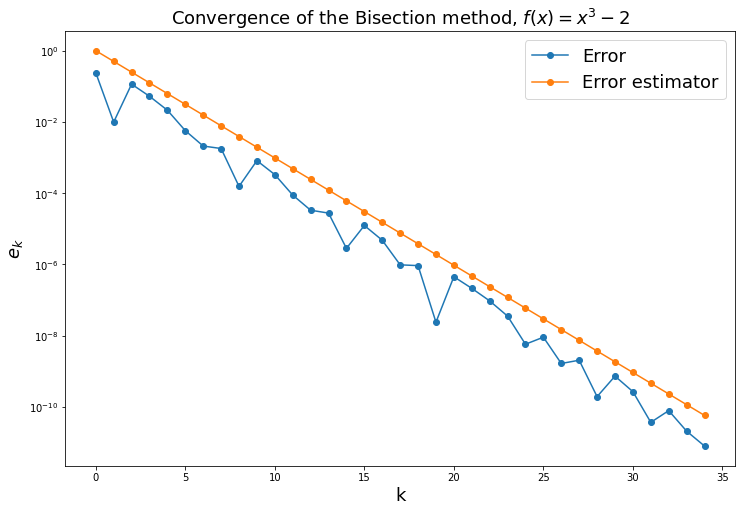

In [12]:
# Test for f(x)=x^3-2 on I=[1,2]

xstar = 2**(1.0/3)

# parameters
a0 = 1
b0 = 2
k_max = 100
eps = 1e-10

# compute the iterations of the bisection method for I0=[1,2]
x = Bisection2(ftest, a0, b0, k_max, eps)

#print x^* and x
print('xstar =', xstar)
print('x =', x)

# create the vector tabk : tabk[k]=k for each iteration made
tabk = np.arange(0, err.size, dtype='float') 
# without the dtype='float', the entries of tabk are of type int32 by default, 
# which does not allow to store large numbers. In particular 2^k might quickly
# become too large, and we then get and overflow (number larger than the largest
# machine number), which does not occur for usual floating-point numbers unless
# k is above 10^3.

# compute the error and the error estimator
err = np.abs(x-xstar)
errEstim = (b0-a0) / (2**tabk) 

# plot the error versus k
fig = plt.figure(figsize=(12, 8))
plt.plot(tabk, err, marker="o", label="Error")
plt.plot(tabk, errEstim, marker="o", label="Error estimator")
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence of the Bisection method, $f(x)=x^3-2$', fontsize=18)
plt.show()

plt.show()

<div markdown=1 class="DoIt"> Comment the previous plot. What is the order of convergence of the error estimator?

<div markdown=1 class='Answer'>

We can check that the true error is always below the error estimator, as it should be. We see that the estimator slightly overestimates the error, but both curves are roughly "parallel", so the estimator seems to have the optimal order. In particular, for the estimator itself we can really say that the convergence is of order $1$, with constant $C=1/2$, since $\beta_{k+1} = \beta_k/2$.

<a id="fixedPoint"></a>
## Fixed point iterations

<table>
        <tr>
            <td><img src="figures/Brouwer.jpeg" alt="Brouwer" style="width: 170px;" /></td>
            <td><img src="figures/Banach.jpg" alt="Banach" style="width: 150px;" /></td>
        </tr>
</table>

>**Luitzen Egbertus Jan Brouwer (1881 – 1966) and Stefan Banach (1892-1945).**
> Brouwer is a Dutch mathematician and philosopher. He proved a lot of results in topology. One of his main theorem is his fixed point theorem (1909). One of its simpler form says that a continuous function from an interval to itself has a fixed point. The proof of the theorem does not provide a method to compute the corresponding fixed point. Among lots of other fixed point results, Brouwer's theorem became very famous because of its use in various fields of mathematics or in economics. In 1922, a polish mathematician, Stefan Banach, stated a contraction mapping theorem, proving in some case the existence of a unique fixed point and providing a constructive iterative method to approximate this fixed point. Banach is one of the founders of modern analysis and is often considered as one of the most important mathematicians of the 20-th century.

A fixed point for a function $g$ is an $x$ such that $g(x)=x$. In this section we consider the problem of finding solutions of fixed point problems. This kind of problem is equivalent to a zero-finding problem in the following sense:

- If $x^*$ is a solution to $f(x)=0$, we can find a function $g$ such that $x^*$ is a fixed point of $g$. For example, one can choose $g(x)=f(x)+x$.

- If $x^*$ is a solution to $g(x)=x$, then, $x^*$ is also a solution to $f(x)=0$ where $f(x)=g(x)-x$.

While a fixed point problem and a zero-finding problem can be equivalent in the sense that they have the same solutions, each of them can be analyzed or approximated with different techniques. In the previous section we introduced the bisection method which can be used for a zero-finding problem. In this section, we focus on fixed point problems, and then use them to solve zero-finding problems. In the following, functions $f$ will be used for root-finding problems and $g$ for corresponding fixed point problems.

First, note that, given a function $f$, the choice of $g$ is not unique. For example, for any function $g$ of the form $g(x) = G(f(x)) + x$, where $G(0)=0$ and $G(x)\neq 0$ for $x\neq 0$, the fixed points of $g$ are in one-to-one correspondence with the zeros of $f$. 

<div mardown=1 class='Ex'>
    

Let us consider again the problem of computing an approximation of $x^*=2^{1/3}$ as the root of $f(x)=x^3-2$. You can check that, for each of five following functions, a fixed point corresponds to a zero of $f$.

- $g_1(x) = x^3-2 + x $
- $\displaystyle g_2(x) = \sqrt{\frac{x^5+x^3-2}{2}}$
- $\displaystyle g_3(x) = -\frac{1}{3} (x^3-2) + x $
- $\displaystyle g_4(x) = -\frac{1}{20} (x^3-2) + x$
- $\displaystyle g_5(x) = \frac{2}{3} x + \frac{2}{3x^2}$

From a numerical point a view, solutions to fixed point problems can be approximated by choosing an initial guess $x_0$ for $x^*$ and generating a sequence by iterating the function $g$: 

$$x_{k+1} = g(x_k),\quad{}\text{for}\quad{} k\geq 0.$$ 

Indeed, suppose that $g$ is continuous and that the sequence $(x_k)_k$ converges to $x_\infty$, then, passing to the limit in the previous equation gives

$$
x_\infty = g(x_\infty),
$$

so the limit $x_\infty$ must be a fixed point of $g$. This leads to the following algorithm:

<div  markdown=1 class="Algo">

**Fixed point iterations method.** Computes a sequence $(x_k)_k$, to try and approximate $x^*$ solution to $g(x^*)=x^*$.


\begin{align*}
INPUT:&\quad{} g, x0\\
DO:&\quad{} x = x0\\
&\quad{} \text{While stopping criterion is not achieved do}\\
&\quad{}\quad{}\quad{} x = g(x)\\
&\quad{} \text{end while}\\
RETURN:&\quad{} x\\
\end{align*}

Now, for a given function $g$, one has to answer the following questions:
- Does $g$ have a fixed point ?
- Does the sequence generated using the fixed point iterations converge ?
- If the sequence converges, how fast does it converge ?

### Graphical investigation

In order to better understand the behavior of fixed point iterations, one can try to visualize them on a graph.

First, the fixed point of a function $g$ can be found graphically, by searching for the intersection between the graph of $g$ and the graph of the function $\phi(x)=x$.

Then, suppose $x_0$ is given and place it on the x-axis. To place $x_1=g(x_1)$ on the same axis, proceed as follows:
- from $(x_0,0)$, go up to find the point $(x_0, g(x_0)) = (x_0,x_1)$, when crossing the graph of $g$,
- from $(x_0,x_1)$ move horizontally to find the point $(x_1,x_1)$, when crossing the graph of $\phi$,
- finally, go back down towards the x-axis to place the point $(x_1,0)$.

Iterate the procedure get the successive points $x_k$. Four examples are given below:

<table>
        <tr>
            <td><img src="figures/FixedPoint1.png" alt="FixedPoint1" style="width: 300px;" /></td>
            <td><img src="figures/FixedPoint2.png" alt="FixedPoint1" style="width: 300px;" /></td>
        </tr>
        <tr>
            <td><img src="figures/FixedPoint3.png" alt="FixedPoint1" style="width: 300px;" /></td>
            <td><img src="figures/FixedPoint4.png" alt="FixedPoint1" style="width: 300px;" /></td>
        </tr>
</table>

Cases with increasing functions $g$ are given on the left and leads to monotonous sequences. On the contrary, oscillating sequences are generated for non increasing functions $g$ (right). For the two examples given at the top $x_k$ seems to converge, but for the two examples given at the bottom it seems to diverge. Let's try to understand why.

### Existence, uniqueness and convergence analysis

<div  markdown=1 class="Thm">

**Existence of a fixed point.**
Let $g: [a,b]\to [a,b]$ be a continuous function. Then,  $g$ has a fixed point in $[a,b]$:

$$
\exists x^*\in[a,b],\quad{} g(x^*)=x^*.
$$

<div markdown=1 class="DoIt"> Complete the proof of the previous theorem.

> **Proof.** 
>If $g(a)=a$ or $g(b)=b$, the proof is finished. If not, since $g([a,b])\subset [a,b]$, we must have $g(a)>a$ and $g(b)<b$. We then consider function $h(x) = g(x) - x$. This function is continuous on $[a,b]$ with $h(a)>0$ and $h(b)<0$. The intermediate value theorem (see Appendix) therefore yields the existence of $x^*\in[a,b]$ such that $h(x^*)=0$ and $x^*$ is a fixed point of $g$.


<div  markdown=1 class="Thm">

**Existence of a unique fixed point, and convergence of the iterates.**
Let $g: [a,b]\to [a,b]$ be a continuous function. Assume

- $g$ is a contraction on $[a,b]$, that is,

$$
\exists K<1 \quad{} \text{such that} \quad{} \forall x,y\in[a,b], \quad{} \vert g(x) - g(y)\vert \leq K \vert x-y\vert.
$$

Then,  $g$ has a unique fixed point in $[a,b]$:

$$
\exists ! x^*\in[a,b],\quad{} g(x^*)=x^*.
$$

Besides, the sequence defined by $x_{k+1}=g(x_k)$ converges to $x^*$ for any choice of $x_0\in [a,b]$. Moreover we have

$$
\forall~k\geq 0,\quad{} \vert x_{k+1} - x^* \vert \leq K \vert x_{k} - x^*\vert,
$$

so that the convergence is at least linear.

> **Proof.** The existence of a fixed point $x^*$ is given by the previous theorem. The fact that $g$ is a contraction ensures the uniqueness of the fixed point. Indeed, if $y^*$ is a fixed point of $g$, then
>
>$$
\vert g(x^*) - g(y^*)\vert \leq K \vert x^*-y^*\vert ,
$$
>
>but $x^*$ and $y^*$ are fixed points of $g$ so we get 
>
>$$
\vert x^* - y^*\vert \leq K\vert x^*-y^*\vert,
$$
>
>and we must have $y^*=x^*$ because $K<1$. The fixed point is unique.
>
> In order to get the convergence estimate for $(x_k)$ we repeat the same argument with $x_{k}$ in place of $y^*$:
>
>$$
\vert g(x_k) - g(x^*) \vert \leq K \vert x_k - x^* \vert,
$$
>
>and since $x_{k+1}=g(x_k)$ this gives the announced estimates, which implies the convergence of $(x_k)_k$ to $x^*$ because $K<1$.

<div  markdown=1 class="Rmk">

- Similarly to what we had for the bisection method, the above theorem gives a *global* convergence result: for any initial condition $x_0$ in $[a,b]$, the sequence is guaranteed to converge to a fixed point of $g$. However, this comes at the cost of a rather strong assumption, namely that $g$ is a contraction on $[a,b]$.

- Notice that, if $g$ is differentiable on $[a,b]$, then the contraction hypothesis is equivalent to assuming that $\vert g'(x)\vert \leq K$ for all $x$ in $[a,b]$ (one implication is obtained by letting $y$ go to $x$, and the other comes from Taylor-Lagrange's formula).

- This assumption can be relaxed, but then the convergence result becomes local: if $x_k$ is sufficiently close to a fixed point $x^*$, then the behavior of $x_{k+1}$ depends only on whether $\vert g'(x^*) \vert$ is smaller or larger than $1$. This is made precise in the following theorem.

<div  markdown=1 class="Thm"> 

**Local convergence/divergence for fixed point iterations.** Let $g: (a,b)\to \mathbb{R}$ be a continuous function, having a fixed point $x^*$ and such that $g$ is differentiable at $x^*$. Consider the sequence $x_{k+1}=g(x_k)$ for $k\geq 0$, $x_0$ being given.

- If $\vert g'(x^*) \vert <1$, there exists $\eta >0$ such that, if $x_0 \in I_\eta = [x^*-\eta, x^*+\eta]$, then $(x_k)_k$ converges to $x^*$, and the convergence is at least linear. If $g'(x^*)\neq 0$, the convergence is exactly linear , and the rate of convergence is $\vert g'(x^*) \vert$.

- If $\vert g'(x^*) \vert >1$, there exists $\eta >0$ such that, if $x_0 \in I_\eta = [x^*-\eta, x^*+\eta]\setminus \{x^*\}$, then eventually $x_k$ gets out of $I_\eta$. 

> **Proof.** 
> We first consider the case $\vert g'(x^*) \vert <1$. The Taylor-Young expansion of order $1$
> at $x^*$ writes
>
>$$
g(x_k) = g(x^*) + g'(x^*)(x_k-x^*) + o(x_k-x^*),
$$
>
>or equivalently
>
>$$
x_{k+1} - x^* = g'(x^*)(x_k-x^*) + (x_k-x^*)\epsilon (x_k-x^*),
$$
>
>where the function $\epsilon$ goes to $0$ at $0$. Since $\vert g'(x^*) \vert <1$, there exists $\alpha>0$ such that $\vert g'(x^*) \vert + \alpha <1$. Next, we consider $\eta >0$ such that, if $x_k \in I_\eta = [x^*-\eta, x^*+\eta]$, $\vert \epsilon (x_k-x^*)\vert \leq \alpha$. This implies that, if $x_k\in I_\eta$, 
>
>\begin{align}
\vert x_{k+1} - x^* \vert &= \vert g'(x^*) + \epsilon (x_k-x^*) \vert \vert x_k-x^*\vert \\
&\leq \left(\vert g'(x^*) \vert + \alpha\right) \vert x_k-x^*\vert.
\end{align}
>
> Since $\vert g'(x^*) \vert + \alpha \leq 1$, $x_{k+1}\in I_\eta$. By induction, all subsequent iterates
> will stay in $I_\eta$, and because $\vert g'(x^*) \vert + \alpha < 1$, $(x_k)_k$ converges to $x^*$.
>
> Finally, going back to $x_{k+1} - x^* = g'(x^*)(x_k-x^*) + o(x_k-x^*)$, we see that, if $g'(x^*) \neq 0$,
>
>$$
\vert x_{k+1} - x^*\vert \sim \vert g'(x^*)\vert \vert x_k-x^*\vert,
$$
>
> and the convergence is indeed linear with rate $\vert g'(x^*)\vert$.
>
> We now consider the case $\vert g'(x^*) \vert >1$. This time, we can take $\alpha>0$ such that $\vert g'(x^*) \vert - \alpha >1$, and $\eta >0$ such that, if $x_k \in I_\eta = [x^*-\eta, x^*+\eta]$, $\vert \epsilon (x_k-x^*)\vert \leq \alpha$.  This implies that, if $x_k\in I_\eta$, 
>
>\begin{align}
\vert x_{k+1} - x^* \vert &= \vert g'(x^*) + \epsilon (x_k-x^*) \vert \vert x_k-x^*\vert \\
&\geq \left(\vert g'(x^*) \vert - \alpha\right) \vert x_k-x^*\vert.
\end{align}
>
> As long as the iterates belong to $I_\eta$, this estimate holds, and at each iteration 
> $\vert x_k-x^*\vert$ is amplified by at least $\vert g'(x^*) \vert - \alpha > 1$. Therefore, as soon as 
> $x_0\neq x^*$, after a finite number of iteration $\vert x_k-x^*\vert$ will become greater than $\eta$.

<div markdown=1 class='Rmk'>

- Notice that the above theorem does not tell us anything about the case $|g'(x^*)|=1$. Indeed, we will see later that both behavior (convergence or divergence) are possible in that case.

- We have just shown that, when it comes to the convergence, the smaller $|g'(x^*)|$, the better, at least while $|g'(x^*)|>0$. In the next theorem, we show that this is actually true up to $|g'(x^*)|=0$, because in that case the convergence is at least quadratic (order $2$ or more).

<div  markdown=1 class="Thm">

**"Better than linear" speed of convergence of fixed point iterations.**
Let $g: (a,b)\to \mathbb{R}$ be a continuous function, having a fixed point $x^*$ and such that $g$ is $p+1$-times differentiable on a neighborhood of $x^*$, for some integer $p\geq 1$. Consider the sequence $x_{k+1}=g(x_k)$ for $k\geq 0$, $x_0$ being given. Suppose 

- $g^{(q)}(x^*)=0$ for $q=1,\ldots,p$.

Then, there exists $\eta >0$ such that, if $x_0 \in I_\eta = [x^*-\eta, x^*+\eta]$, then $(x_k)_k$ converges to $x^*$, and the convergence is at least of order $p+1$. If $g^{(p+1)}(x^*)\neq 0$, the convergence is exactly of order $p+1$.

> **Proof.** The proof is  very similar to the one done just above in the case $\vert g'(x^*)\vert<1$. 
> The only difference is that we do a Taylor-Young expansion of $g$ around $x^*$ at a higher order, namely $p+1$, since all the lower order terms vanish by assumption, which yields
>
>$$ 
x_{k+1} - x^* = \frac{g^{(p+1)}(x^*)}{(p+1)!}(x_k-x^*)^{p+1} + o\left( (x_k-x^*)^{p+1}\right).
$$
>
> The remainder of the proof follows as above, and we omit the details.

### Stopping criterion

For fixed points problems, a natural stopping criterion is to ask that $\vert x_{k+1} - x_k\vert$ becomes less than some tolerance $\varepsilon$. Indeed, in that case $x_{k+1}=g(x_k)$ and therefore we are asking for $g(x_k)-x_k$ to be close to $0$, i.e. $x_k$ is an approximate fixed point. Of course, as mentioned previously, without some error estimator we cannot certify that such a stopping criterion yields a solution which is actually close to a fixed point. However, let us mention that, if $x_k$ does converge to a fixed point $x^*$, then using once more Taylor-Young's formula we see that

\begin{align}
x_{k+1} - x_k &= g(x_k) - g(x^*) + x^* - x_k \\
&= (1-g'(x^*)) (x^*-x_k) + o(x^*-x_k),
\end{align}

and therefore $\vert x_{k+1} - x_k\vert$ gives a good control on the error $\vert x_k - x^*\vert$, as long as $g'(x^*)$ is not too close to $1$.

### Numerical tests

<div markdown=1 class="DoIt"> Complete the following function. It shall compute the sequence generated using the fixed point algorithm for a given function $g$. The algorithm terminates when $\vert x_{k+1}-x_k\vert$ is below some tolerance $\varepsilon$, or when a given number $k_{max}$ of iterations have been made.

In [13]:
def FixedPoint(g, x0, k_max, eps):
    """
    Fixed point algorithm x_{k+1} = g(x_k)
    -----------------------
    Inputs: 
    g : name of the function
    x0 : initial point
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Output: 
    x = the sequence x_k 
    """
    x = np.zeros(k_max+1)  # create a vector x of zeros with size k_max+1
    k = 0
    x[0] = x0  
    while np.abs(g(x[k])-x[k]) > eps and  k < k_max:
        x[k+1] = g(x[k])
        k = k+1
    return x[:k+1]

<div markdown=1 class="DoIt"> We consider again the 5 functions $g_i$, $i=1,\ldots,5$, proposed at the beginning of the section to compute $x^*=2^{1/3}$. Run the following cells to observe the behavior of the algorithm for these 5 functions. Try also to change the initial point $x_0$. Comment on the observed results in light of the previous theorems.

In [14]:
xstar = 2**(1.0/3)

- $g_1(x) = x^3-2 + x $

In [15]:
def g1(x):
    return x**3 - 2 + x

x0 = xstar + 0.001 
#x0 = xstar - 0.001

k_max = 20
eps = 1e-5

x1 = FixedPoint(g1, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x1)

xstar = 1.2599210498948732
x = [1.26092105e+000 1.26568703e+000 1.29327168e+000 1.45633533e+000
 2.54509524e+000 1.70309746e+001 4.95493491e+003 1.21650495e+011
 1.80028656e+033 5.83478577e+099 1.98643677e+299             inf]


<ipython-input-15-c7d91cb86938>:2: RuntimeWarning: overflow encountered in double_scalars
  return x**3 - 2 + x
<ipython-input-13-0e3a7f1e3f73>:17: RuntimeWarning: invalid value encountered in double_scalars
  while np.abs(g(x[k])-x[k]) > eps and  k < k_max:


<div markdown=1 class='Answer'>

$ \vert g_1'(x^*)\vert = \vert 1 + 3 \times 2^{2/3} \vert >1 $. As expected in that case, the algorithm does not converge to $x^*$, whatever the value of $x_0$. Worst, the value of $x_k$ can become extremely large, and we get an *overflow*, i.e. a number whose absolute value is larger than the largest machine number.

- $\displaystyle g_2(x) = \sqrt{\frac{x^5+x^3-2}{2}}$

In [16]:
def g2(x):
    return np.sqrt( (x**5 + x**3 - 2) / 2 )

x0 = xstar - 0.001
#x0 = xstar + 0.001

k_max = 20
eps = 1e-5

x2 = FixedPoint(g2, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x2)

xstar = 1.2599210498948732
x = [1.25892105 1.25647611 1.24805342 1.21903329 1.11882798 0.75949395]


<ipython-input-16-25fe28cd692c>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt( (x**5 + x**3 - 2) / 2 )


<div markdown=1 class='Answer'>

Here again, one can check that $ \vert g_2'(x^*)\vert >1 $, therefore the algorithm is not expected to converge to $x^*$. Worst, $g_2$ is only defined on $I=[1,+\infty)$, but this interval is not stable by $g_2$, that is, there exists $x\in I$ such that $g(x)\notin I$. This means that the sequence $(x_k)_k$ might not longer be defined at some point, which we actually observe here when $x_0$ is below $x^*$.

- $\displaystyle g_3(x) = -\frac{1}{3} (x^3-2) + x $

In [17]:
def g3(x):
    return - (x**3-2)/3 + x

x0 = xstar + 1
# x0 = xstar + 2

k_max = 20
eps = 1e-5

x3 = FixedPoint(g3, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x3)

err3 = abs(x3-xstar)
print('\nerror =', err3)

xstar = 1.2599210498948732
x = [ 2.25992105 -0.92073439  0.00611703  0.67278362  1.23794119  1.2722269
  1.25250117  1.26421027  1.25737835  1.26140649  1.25904572  1.26043426
  1.25961926  1.26009821  1.25981695  1.25998219  1.25988513  1.25994215
  1.25990866  1.25992833  1.25991677]

error = [1.00000000e+00 2.18065544e+00 1.25380402e+00 5.87137431e-01
 2.19798632e-02 1.23058484e-02 7.41988420e-03 4.28921940e-03
 2.54269757e-03 1.48544292e-03 8.75331896e-04 5.13205741e-04
 3.01789475e-04 1.77156715e-04 1.04101584e-04 6.11357267e-05
 3.59158993e-05 2.10954118e-05 1.23920278e-05 7.27889667e-06
 4.27569832e-06]


<div markdown=1 class='Answer'>

This time, $ \vert g_3'(x^*)\vert = \vert 1 - 2^{2/3} \vert \approx 0.59 < 1 $, therefore the algorithm should converge linearly to $x^*$, at least when $x_0$ is *close enough* to $x^*$. This is exactly what we observe, i.e. convergence when $x_0$ is close enough to $x^*$, but sometimes the algorithm diverges if $x_0$ is too far away (for instance $x_0=x^*+2$). 

- $\displaystyle g_4(x) = -\frac{1}{20} (x^3-2) + x$

In [18]:
def g4(x):
    return - (x**3-2)/20 + x

x0 = xstar + 1
# x0 = xstar + 5

k_max = 20
eps = 1e-5

x4 = FixedPoint(g4, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x4)

err4 = abs(x4-xstar)
print('\nerror =', err4)

xstar = 1.2599210498948732
x = [2.25992105 1.78282273 1.59949147 1.49488669 1.42785655 1.38230269
 1.3502402  1.32715578 1.31027699 1.29780112 1.28850759 1.28154524
 1.27630742 1.2723547  1.26936481 1.26709925 1.26538029 1.26407475
 1.26308245 1.2623278  1.26175363]

error = [1.         0.52290168 0.33957042 0.23496564 0.1679355  0.12238164
 0.09031915 0.06723473 0.05035594 0.03788007 0.02858654 0.02162419
 0.01638637 0.01243365 0.00944376 0.0071782  0.00545924 0.0041537
 0.0031614  0.00240675 0.00183258]


<div markdown=1 class='Answer'>

This time, $ \vert g_4'(x^*)\vert = \vert 1 - 3/20 \times 2^{2/3} \vert \approx 0.76 < 1 $, therefore the algorithm should also converge linearly to $x^*$, at least when $x_0$ is *close enough* to $x^*$. This is again what we observe. When the algorithm does converges, the convergence seems to be slower than in the previous case, which is coherent with the fact that $ \vert g_3'(x^*)\vert < \vert g_4'(x^*)\vert$.

The algorithm also no longer converges for some $x_0$ which are too far away from $x^*$, but one has to go *further away* than in the previous example. This emphasize that is it hard to know in advance what the *close enough* condition for convergence is, and that this can vary a lot from case to case.

- $\displaystyle g_5(x) = \frac{2}{3} x + \frac{2}{3x^2}$

In [19]:
def g5(x):
    return 2*x/3 + 2/(3*x**2)

x0 = xstar + 1

k_max = 20
eps = 1e-5

x5 = FixedPoint(g5, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x5)

err5 = abs(x5-xstar)
print('\nerror =', err5)

xstar = 1.2599210498948732
x = [2.25992105 1.6371476  1.34016454 1.2646298  1.25993856 1.25992105]

error = [1.00000000e+00 3.77226550e-01 8.02434896e-02 4.70875296e-03
 1.75109233e-05 2.43369769e-10]


<div markdown=1 class='Answer'>

For this last case, we have $ \vert g_5'(x^*)\vert = 0$, so not only does the algorithm converge when $x_0$ is *close enough* to $x^*$, but it does so quadratically. Indeed, we observe that the convergence seems to be much faster than in the previous two cases.

<div markdown=1 class="DoIt"> Compare graphically the convergence of the sequences obtained with $g_3$, $g_4$,  and $g_5$:

- On the same figure, plot the three errors versus $k$ with log-scale for the error. 
- On the same figure, plot the $e_{k+1}$ versus $e_k$ in log-log scale for the three methods.

Do not forget titles, labels and legends.

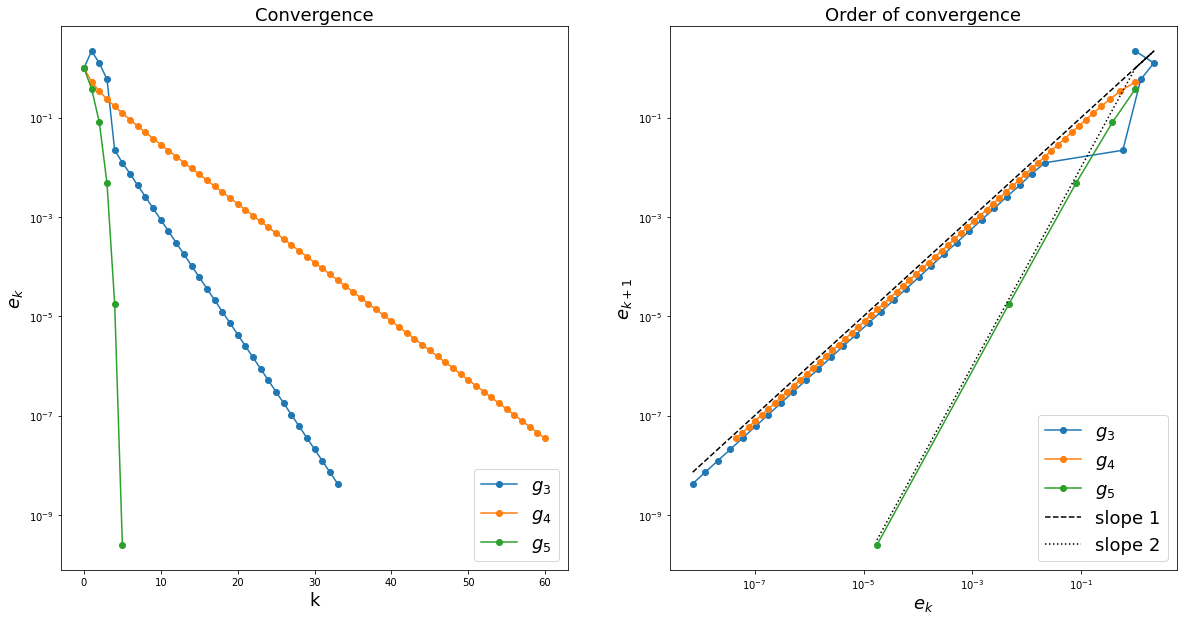

In [20]:
# initialization
x0 = xstar + 1

# parameters for the algorithms
k_max = 100
eps = 1e-8

# computation of the iterates 
x3 = FixedPoint(g3, x0, k_max, eps)
x4 = FixedPoint(g4, x0, k_max, eps)
x5 = FixedPoint(g5, x0, k_max, eps)

# computation of the errors
err3 = abs(x3-xstar)
err4 = abs(x4-xstar)
err5 = abs(x5-xstar)

# the index of each iterate stopping at the appropriate value in each case
tabk3 = np.arange(0, err3.size, dtype='float') 
tabk4 = np.arange(0, err4.size, dtype='float') 
tabk5 = np.arange(0, err5.size, dtype='float')

fig = plt.figure(figsize=(20, 10))

plt.subplot(121) # plot of e_k versus k for the three cases
plt.plot(tabk3, err3, marker="o", label='$g_3$')
plt.plot(tabk4, err4, marker="o", label='$g_4$')
plt.plot(tabk5, err5, marker="o", label='$g_5$')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('k', fontsize=18)
plt.ylabel('$e_{k}$', fontsize=18)
plt.yscale('log')        # log scale for the error
plt.title('Convergence', fontsize=18)

plt.subplot(122) # plot of log e_{k+1} versus log e_{k} for the three cases
plt.loglog(err3[:-1:], err3[1:], marker="o", label='$g_3$') #log-log scale
plt.loglog(err4[:-1:], err4[1:], marker="o", label='$g_4$') #log-log scale
plt.loglog(err5[:-1:], err5[1:], marker="o", label='$g_5$') #log-log scale
plt.loglog(err3[:-1:], err3[:-1:], '--k', label='slope 1')
plt.loglog(err5[:-1:], err5[:-1:]**2, ':k', label='slope 2')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

<div markdown=1 class="DoIt">  Comment on the previous figures.

<div markdown=1 class='Answer'> 
We see that the convergence is linear for $g_3$ and $g_4$ (but faster for $g_3$), and quadratic for $g_5$. This is due to the fact that $0<\vert g_3'(x^*)\vert < \vert g_4'(x^*)\vert <1$ and $\vert g_5'(x^*)\vert = 0$.

<div markdown=1 class="DoIt"> Run the two following cells to test the fixed point algorithm for the functions:

- $g_6(x) = x-x^3$
- $g_7(x) = x+x^3$

What can you conclude for the case $|g'(x^*)|=1$ ?

In [21]:
def g6(x):
    return x - x**3

xstar = 0

k_max = 20
eps = 1e-10
x0 = 0.1

x6 = FixedPoint(g6, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x6)

xstar = 0
x = [0.1        0.099      0.0980297  0.09708765 0.0961725  0.09528299
 0.09441793 0.09357622 0.09275682 0.09195875 0.09118111 0.09042303
 0.0896837  0.08896236 0.08825829 0.0875708  0.08689925 0.08624303
 0.08560157 0.08497431 0.08436074]


In [22]:
def g7(x):
    return x + x**3

xstar = 0

k_max = 20
eps = 1e-10
x0 = 0.1

x7 = FixedPoint(g7, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x7)

xstar = 0
x = [0.1        0.101      0.1020303  0.10309246 0.10418813 0.10531911
 0.10648732 0.10769484 0.1089439  0.11023693 0.11157655 0.1129656
 0.11440718 0.11590466 0.11746171 0.11908236 0.12077102 0.12253254
 0.12437227 0.12629612 0.12831063]


<div markdown=1 class='Answer'>

In both cases $x^*=0$ is a fixed point. The algorithm seems to converge to $x^*$, albeit very slowly, for $g_6$, and to diverge for $g_7$. In both cases we have $\vert g'(x^*) \vert = 1$ , so this example shows that, in the limiting case $\vert g'(x^*) \vert = 1$ we cannot predict the behavior of the fixed point algorithm, at least not without extra assumptions.

<a id="Newton"></a>
## The Newton-Raphson method

<img src="figures/Newton.jpg" alt="Brouwer" style="width: 170px;" />

>**Isaac Newton (1643 – 1727).**
> English mathematician, astronomer, theologian, author and physicist, Isaac Newton is known as one of the most important scientists. He made breaking contributions to classical mechanics, optic and also contributed to infinitesimal calculus. In particular, he described in 1671 a method to find zeros of polynomials, which was only published in 1736, and was the basis for what is now known as the Newton-Raphson method. Indeed, it was first published (with a reference to Newton) by another English mathematician, Joseph Raphson in 1690. Both of them focused only on zeros of polynomial functions, but the basis of the general method was already present in their works.

The Newton-Raphson (or simply Newton's) method is one of the most powerful and well-known method to solve $f(x)=0$ problems. The simplest way to describe it is to see it as a graphical procedure: $x_{k+1}$ is computed as the intersection with the $x$-axis of the tangent line to the graph of $f$ at point $(x_k,f(x_k))$.

<img src="figures/NewtonFig.png" alt="Algo Newton" style="width: 600px;" />

For a given $x_k$, the equation of the tangent line at $(x_k,f(x_k))$ is

$$
y = f(x_k) + f'(x_k)(x-x_k),
$$

therefore $x_{k+1}$ is defined by

$$
0 = f(x_k) + f'(x_k)(x_{k+1}-x_k),
$$

and as soon as $f'(x_k)$ is non zero, this gives

$$
x_{k+1} = x_k - \frac{f(x_{k})}{f'(x_k)},
$$

which is the definition of Newton's method.

<div  markdown=1 class="Algo">

**Newton-Raphson method.** Computes a sequence $(x_k)_k$, approximating $x^*$ solution to $f(x^*)=0$.


\begin{align*}
INPUT:&\quad{} f, x0\\
DO:&\quad{} x = x0\\
&\quad{} \text{While stopping criterion is not achieved do}\\
&\quad{}\quad{}\quad{} x = x - \frac{f(x)}{f'(x)}\\
&\quad{} \text{end while}\\
RETURN:&\quad{} x\\
\end{align*}

<div markdown=1 class='Rmk'>

If we introduce the function

$$
g(x) = x - \frac{f(x)}{f'(x)},
$$

Newton's method is nothing but the fixed point iteration method for $g$, i.e. $x_{k+1} = g(x_k)$. Therefore, we can use the theorems we obtained on fixed point problems to study the convergence of Newton's method.

<div markdown=1 class='DoIt'>

Can you make a link between Newton's algorithm and the function $g_5$ studied in the previous section?

<div markdown=1 class='Answer'>
$g_5$ was one of many fixed point maps introduced to approximate the zero of $f(x) = x^3-2$. A quick computation shows that $g_5(x)$ is nothing but $x - \frac{f(x)}{f'(x)}$ for this specific $f$. In other words, the iterates produced by $g_5$ are the iterates of Newton's method applied to this function $f$. 

Remember that the convergence for $g_5$ was very fast (quadratic). We show below that this is in fact always the case for Newton's method, under some non-degeneracy assumptions.

<div  markdown=1 class="Thm"> 

**Local convergence of Newton's method.** Let $f: (a,b)\to \mathbb{R}$ be a $C^2$ function having a zero $x^*$. Consider the sequence $(x_k)_k$ generated by Newton's method for $k\geq 0$, $x_0$ being given. Assume

- $f'(x^*)\neq 0\quad$ ($x^*$ is a simple root of $f$).

Then, there exists a neighborhood $I$ of $x^*$ such that, for any $x_0\in I$, Newton's iterations converge to $x^*$ and the convergence is at least of order 2.

> **Proof.** We consider the function 
>
>$$
g(x)=x - \frac{f(x)}{f'(x)}.
$$
>
>By assumption, $f'$ is continuous in a neighborhood of $x^*$. Since $f'(x^*)\neq 0$, $f'(x)$ does not 
>vanish in a neighborhood of $x^*$, therefore $g$ is well defined at least in a neighborhood of $x^*$. 
>Assuming for simplicity that $f$ is thrice differentiable (see the second remark after the proof otherwise)
>$g$ becomes twice differentiable (since $f$ is thrice differentiable). Furthermore, 
>
>$$
g'(x) = 1 - \frac{(f'(x))^2 - f(x)f''(x)}{(f'(x))^2} = \frac{f(x)f''(x)}{(f'(x))^2},
$$
>
>and since $x^*$ is a zero of $f$, we have $g'(x^*)=0$. We can therefore apply the theorem on "Better than linear" speed of convergence of fixed point iterations, with $p=1$, which yields that, if $x_0$ is close enough to $x^*$, $(x_k)_k$ converges at least quadratically to $x^*$.

<div  markdown=1 class="Rmk">

**Advantages and drawbacks of Newton's methods**

Newton's method had two great advantages, which explain why it is so often used in practice:
- The order of convergence is **quadratic**.
- It is **straightforward to generalized in higher dimension** (looking for zeros of a function $f:\mathbb{R}^d\to\mathbb{R}^d$) which is not the case of the bisection method for instance.

However, it also suffers from several drawbacks:
- The convergence is only **local**, i.e. if $x_0$ is close enough to $x^*$, which means that we first need to have a rough guess of where the zero is.
- Dealing with the derivative can be challenging and/or **expensive**, especially in higher dimensions. If that is the case, one can use approximations of the derivative instead. This leads to the secant method in dimension one, where $f'(x_k)$ is replaced by
$$
\frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}},
$$
or more generally to so-called *Quasi-Newton methods* in higher dimensions.
- The quadratic convergence only holds if $f'(x^*)\neq 0$, which in particular implies that the zero $x^*$ must be locally unique. If that condition is not satisfied, the algorithm might still converge, but the convergence will then be at most linear.

<div markdown=1 class='Fur'>

We did not prove the theorem about the convergence of Newton's method with minimal smoothness assumptions on $f$. Indeed, it is enough to assume that $f$ is $C^2$, but in that case one cannot simply apply the theorem on "Better than linear" speed of convergence of fixed point iterations to get the proof, because $g$ is not necessarilly smooth enough. Instead, one must directly use some Taylor expansions for $f$.

Regarding the stopping criterion, notice that two of the usual candidates for a zero-finding problem, namely

$$
\vert x_{k+1} - x_k \vert \leq \varepsilon \quad{}\text{and}\quad{} \vert f(x_k) \vert \leq \varepsilon,
$$

are closely related in the case of Newton's method, at least as long as $\vert f'(x_k)\vert$ stays reasonably far away from $0$ and $+\infty$, since we have

$$
x_{k+1} - x_k = -\frac{f(x_k)}{f'(x_k)}.
$$

### Examples

We are now going to use Newton's method on our easy test problem for this lecture, namely to find a zero of $f(x) = x^3-2$. Slightly more sophisticated examples will be treated later and in the case studies.

<div markdown=1 class="DoIt"> Implement Newton's method and test it to approximate $x^*=2^{1/3}$, the unique solution in $\mathbb R$ to $f(x) = x^3-2=0$. Check that you indeed have quadratic convergence by first printing the error at each step, and then by using an appropriate plot.

In [23]:
def Newton(f, df, x0, k_max, eps):
    """
    Newton's algorithm to find a zero of a scalar function f, x_{k+1} = x_k - f(x_k)/f'(x_k)
    -----------------
    Inputs:
    f: the function
    df: the function's derivative
    x0 : initial point
    k_max : maximal number of iterations
    eps : tolerance for the stopping criterion
    
    Outputs:
    x = the sequence x_k
    """
    # create vector x
    x = np.zeros(k_max+1)
    x[0] = x0
    k = 0
    # computation of x_k
    while  np.abs(f(x[k])) > eps  and  k < k_max :
        x[k+1] = x[k] - f(x[k])/df(x[k])
        k = k + 1
    return x[:k+1]

In [24]:
def ftest(x):
    return x**3 - 2

def dftest(x):
    return 3*x**2

k_max = 10
eps = 1e-10
x0 = 1
xstar = 2**(1/3)

x = Newton(ftest, dftest, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x)

err = abs(x-xstar)
print('\nerror =', err)

xstar = 1.2599210498948732
x = [1.         1.33333333 1.26388889 1.25993349 1.25992105 1.25992105]

error = [2.59921050e-01 7.34122834e-02 3.96783899e-03 1.24435551e-05
 1.22896582e-10 0.00000000e+00]


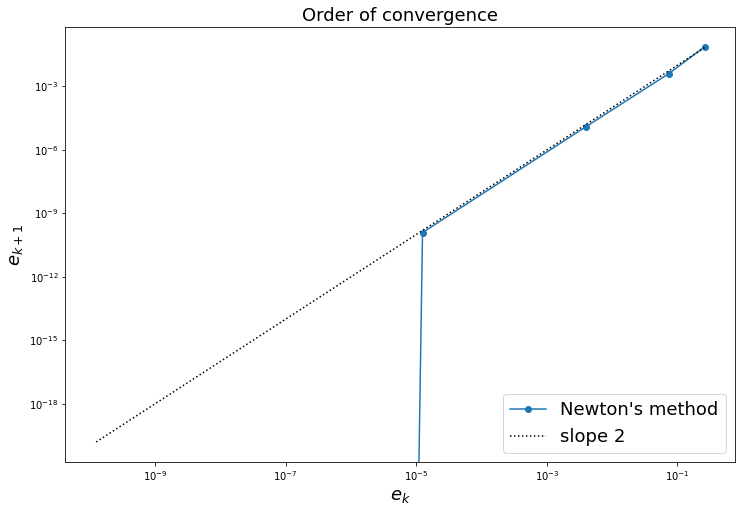

In [25]:
# log-log plot of the error

tabk = np.arange(0, err.size, dtype='float')

fig = plt.figure(figsize=(12, 8))
plt.loglog(err[:-1:], err[1:], marker="o", label="Newton's method") #log-log scale
plt.loglog(err[:-1:], err[:-1:]**2,':k',label='slope 2')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

The curve for Newton's method drops at the end because the error is exactly $0$ (or rather, the error between $x_k$ and the floating point approximation of $x^*$ is zero).

<div markdown=1 class="DoIt"> Consider now the function $F_1(x) = x^5 - x + 1$. First plot this function on $[-1.5,1.5]$, and then try to use Newton's method to approximate it's real zero. Try several initial conditions , like $x_0=-1.5$ and $x_0=-0.5$, and comment on the results.

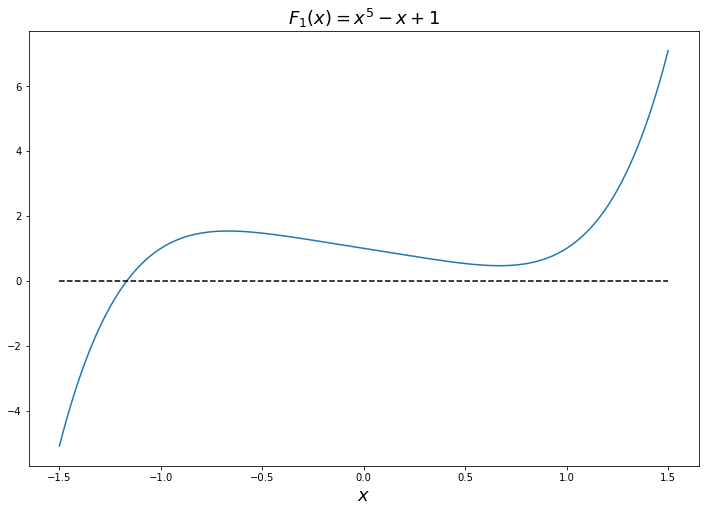

In [26]:
def F1(x):
    return x**5 - x + 1

def dF1(x):
    return 5*x**4 - 1


pts = np.linspace(-1.5, 1.5, 500)
fig = plt.figure(figsize=(12, 8))
plt.plot(pts, F1(pts))
plt.plot(pts, 0*pts, '--k')
plt.xlabel('$x$', fontsize=18)
plt.title(r'$F_1(x)=x^5-x+1$', fontsize=18)


plt.show()

In [27]:
k_max = 50
eps = 1e-15
x0 = -1.5

x = Newton(F1, dF1, x0, k_max, eps)
print('x =', x)
print('\n|F(x)| =', np.abs(F1(x)))

x = [-1.5        -1.29048843 -1.19034293 -1.1682755  -1.16730579 -1.16730398
 -1.16730398]

|F(x)| = [5.09375000e+00 1.28858475e+00 1.99451206e-01 8.06248619e-03
 1.49816619e-05 5.20301580e-11 6.66133815e-16]


<div mardown=1 class='Answer'>
This example emphasizes that the convergence of Newton's method is only guaranteed locally. Indeed, we found some initial values, near $-0.5$ or $0.5$ for instance, for which the sequence seems to oscillate and never converge. On the other hand, if $x_0$ is close enough the the zero $x^*$ of $F$, we do have (quadratic) convergence as expected.

<div markdown=1 class="DoIt"> Finally, consider the function $F_2(x) = x^2(x^2+2)$, and try to use Newton's method to approximate it's real zero. Study the convergence rate graphically, and comment on the results.

In [28]:
def F2(x):
    return x**2 * (x**2 + 2)

def dF2(x):
    return 4*x**3 + 4*x

k_max = 100
eps = 1e-10
x0 = 1
xstar = 0

x = Newton(F2, dF2, x0, k_max, eps)
print('xstar =', xstar)
print('x =', x)

err = abs(x-xstar)
print('\nerror =', err)

xstar = 0
x = [1.00000000e+00 6.25000000e-01 3.56390449e-01 1.88236499e-01
 9.57286336e-02 4.80816389e-02 2.40685446e-02 1.20377560e-02
 6.01931403e-03 3.00971153e-03 1.50486258e-03 7.52432144e-04
 3.76216178e-04 1.88108102e-04 9.40540529e-05 4.70270267e-05
 2.35135134e-05 1.17567567e-05 5.87837834e-06]

error = [1.00000000e+00 6.25000000e-01 3.56390449e-01 1.88236499e-01
 9.57286336e-02 4.80816389e-02 2.40685446e-02 1.20377560e-02
 6.01931403e-03 3.00971153e-03 1.50486258e-03 7.52432144e-04
 3.76216178e-04 1.88108102e-04 9.40540529e-05 4.70270267e-05
 2.35135134e-05 1.17567567e-05 5.87837834e-06]


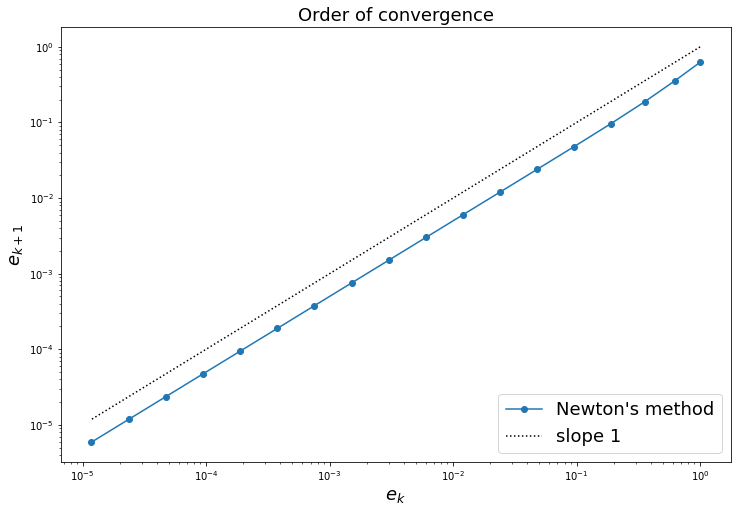

In [29]:
# log-log plot of the error

tabk = np.arange(0, err.size, dtype='float')

fig = plt.figure(figsize=(12, 8))
plt.loglog(err[:-1:], err[1:], marker="o", label="Newton's method") #log-log scale
plt.loglog(err[:-1:], err[:-1:],':k',label='slope 1')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('$e_k$', fontsize=18)
plt.ylabel('$e_{k+1}$', fontsize=18)
plt.title('Order of convergence', fontsize=18)

plt.show()

<div mardown=1 class='Answer'>
We seem to have convergence, but only of order 1. While the theorem we have seen on Newton's method guarantees at least convergence of order 2 (if $x_0$ is close enough to $x^*$), it requires a crucial assumption, namely that $f'(x^*)\neq 0$. However, in this case the zero of $F_2$ is $0$ and we have $F_2'(0) = 0$, so the theorem does not apply. This example shows that the assumption $f'(x^*)\neq 0$ is really necessary if one wants to guarantee at least quadratic convergence.

<a id="CaseStudy"></a>
## Back to the case studies

We come back here to the case studies described in the introduction and try to solve them using the methods presented above.

### Case study 1: State equation of a gaz, a solution using bisection

We use the bisection method to solve case study 1 and compute the volume of $1000$ molecules of $\text{CO}_2$ at temperature $T=300\,K$ and pressure $p=3.5 \cdot 10^7 \,Pa$. 

To do so, we have to solve the following equation for $V$:

$$
f(V)=\left[p + a \left( \frac{N}{V}\right)^2\right] (V-Nb) - kNT =0
$$

with $N=1000$, $k=1.3806503 \cdot 10^{-23} \,J\,K^{-1}$, $a=0.401 \,Pa\,m^6$ and $b=42.7 \cdot 10^{-6}\, m^3$.

<div markdown=1 class="DoIt"> Solve the problem using the bisection method.

In [30]:
k = 1.3806503e-23
a = 0.401
b = 42.7e-6
N = 1000.0
T = 300.0
p = 3.5e7
    
## Function f

def fgaz(V):
    return (p + a * (N/V)**2) * (V-N*b) - k*N*T

From the expression of $f$, we see that $f$ will be positive for very small $V$, and negative for $V=Nb$, so we plot the function $f$ between these values, to have a rough idea of where the zero will be.

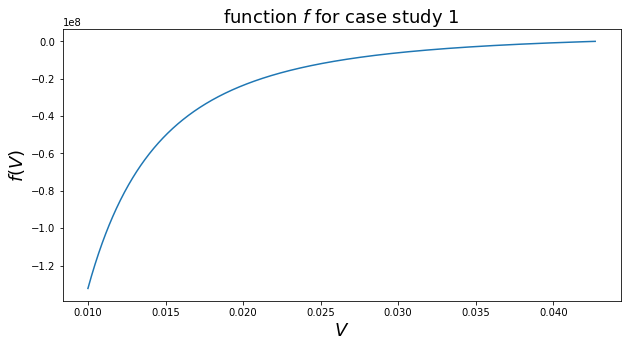

In [31]:
## plot of f
tabV = np.linspace(1e-2, N*b , 1000)
fig = plt.figure(figsize=(10, 5))
plt.plot(tabV, fgaz(tabV))
plt.xlabel('$V$', fontsize=18)
plt.ylabel('$f(V)$', fontsize=18)
plt.title("function $f$ for case study 1", fontsize=18)
plt.show()

We cannot start at $V=0$ because $f$ is not defined there. On the above plot, it is difficult to see precisely where the zero is, but at least this shows that $10^{-2}$ is an appropriate value for the left bound of the bisection ($f$ is still negative for this value), and we are now ready to apply the bisection algorithm. We use `Bisection2` because it uses the stopping criterion based on the error estimator, and therefore we are guaranteed to end up with a solution having the requested accuracy.

In [32]:
## Resolution
Vmin = 1e-2
Vmax = N*b
eps = 1.0e-6
k_max = 1000
V = Bisection2(fgaz, Vmin, Vmax, k_max, eps)

print('precision: eps =', eps)
print('number of iterations =', V.size)
print('Volume of the gaz =', V[-1])

The inputs do not satisfy the assumptions of the bissection method
precision: eps = 1e-06


AttributeError: 'NoneType' object has no attribute 'size'

<div markdown=1 class='Answer'>
The volume of the gas of approximately $0.0427 \, m^3$.

### Case study 2: Investment fund, solutions using bisection or Newton's method

We recall that we have to find $i$ solution to

$$
f(i) = d \frac{(1+i)^{n_{end}}-1}{i} - S =0 \quad{} \text{ where } \quad{} S=30\,000, \quad{} d=30,\quad{} \text{and} \quad{} n_{end} = 120
$$


<div markdown=1 class="DoIt"> Solve the problem using the bisection method and/or Newton's method.

We first provide a solution using the bisection method

In [ ]:
d = 30.0
S = 30000.0
n = 120.0
    
## Function f

def finterest(i):
    return d * ((1+i)**n-1)/i - S

In [ ]:
## plot of f
tabi = np.linspace(0.01,0.05,1000)
fig = plt.figure(figsize=(10, 5))
plt.plot(tabi, finterest(tabi))
plt.xlabel('$i$', fontsize=18)
plt.ylabel('$f(i)$', fontsize=18)
plt.title("function $f$ for case study 2", fontsize=18)
plt.show()

In [ ]:
## Resolution
imin = 0.01
imax = 0.05

eps= 1e-4
k_max = 1000

i = Bisection2(finterest, imin, imax, k_max, eps)

print('precision: eps =', eps)
print('number of iterations =', i.size)
print('minimal interest rate =', i[-1])

<div markdown=1 class='Answer'>
The minimum monthly interest rate required is $2.87\%$.

We now solve the same problem using Newton's method.

In [ ]:
## derivative of the function finterest
def dfinterest(i):
    return d * ((1+i)**(n-1) * ((n-1)*i-1) + 1)/(i**2)

In [ ]:
## Resolution
eps= 1e-4
k_max = 1000
i0 = 0.05

i_Newton = Newton(finterest, dfinterest, i0, k_max, eps)

print('precision: eps =', eps)
print('number of iterations =', i_Newton.size)
print('minimal interest rate =', i_Newton[-1])

<div markdown=1 class='Answer'>
The minimum monthly interest rate required is $2.87\%$.

### Case study 3: A first population model, a solution using Newton's method

We want to find an approximation for the natural growth rate $\lambda$ in France. To do so, we have to solve the following non-linear equation for $\lambda$ (we know that $\lambda \neq 0$ since the population increases more than the migratory balance):

$$
f(\lambda) = N(2017) - N(2016)\exp(\lambda) - \frac{r}{\lambda}(\exp(\lambda)-1),
$$

where $N(2016)=66\, 695\, 000$, $N(2017)=66\, 954\, 000$ and $r=67\, 000$.



<div markdown=1 class="DoIt"> Solve the problem using Newton's method. 

In [ ]:
N0 = 66695000.0
N1 = 66954000.0
r = 67000.0

def fpop(l):
    return N1 - N0*exp(l) - r*(exp(l)-1)/l

def dfpop(l):
    expl = exp(l)
    return - N0*expl + r*(expl-1)/(l**2) - r*expl/l

In [ ]:
## Resolution

eps= 1e-6
k_max = 1000
l0 = 0.1

l = Newton(fpop, dfpop, l0, k_max, eps)

print('precision: eps =', eps)
print('number of iterations =', l.size)
print('natural growth rate =', l[-1])

<div markdown=1 class='Answer'>
With this model, the growth rate in France is of approximately $\lambda = 0.0029$.

## Appendix

### Intermediate value theorem


<div  markdown=1 class="Thm">

**Intermediate value Theorem**

Suppose $f: [a,b]\mapsto \mathbb{R}$ is continuous on $[a,b]$. Define $m=\min\{f(a),f(b) \}$ and $M=\max\{f(a),f(b) \}$. Then,

$$
\forall y \in ]m,M[,\quad{} \exists x\in]a,b[\quad{} \text{such that}\quad{} f(x)=y.
$$

As a consequence, if a continuous function takes values of opposite signs in an interval, it has a root in this interval.

The following figure provides an example of $x$ guaranteed by this theorem. In this case, the zero is not unique.

<img src="figures/ThmValInt.png" alt="Intermediate Value Thm" style="width: 600px;" />

In [ ]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()